# **Lab 2 - BCD Detector**
-----

### Objectives:
x To understand the Sum-of-Product (SOP) form
x To apply the Karnaugh map method to simplify a Boolean equation
x To apply “don’t care” states to a Karnaugh Map (K-map)
x To create a MultiSim simulation of a digital circuit

Text References:
Chapters 1-4, 6

### Components Needed: (quantities unknown)
- 7400 IC – quad two-input NAND gate
- 7404 IC – hex inverter (NOT gate)
- 7408 IC – quad two input AND gate
- 7420 IC – 4-input NAND gate
- 7432 IC – quad two input OR gate

#### Discussion:
The Karnaugh map (K-map) method of simplification is a powerful graphical technique.
The advantages of using K-maps for reduction is that it is easier to see when the
expression has been fully simplified and the K-map method provides a structured
approach to Boolean simplification.

In this experiment, you will design a BCD detector, implement it in MultiSim, simplify the
design using a K-map, implement the new designs and do a cost analysis. Start with a
truth table for your first design. Think about which 4 input digital numbers make a valid
BCD code. Pay special attention to the specifications that follow. We will look at cost of
this BCD detector as changes are made. The specification for the BCD detector is as
follows:


- #### Components:
    - 7400 IC – quad two-input NAND gate
    - 7404 IC – hex inverter (NOT gate)
    - 7408 IC – quad two input AND gate
    - 7420 IC – four-input NAND gate
    - 7432 IC – quad two input OR gate
- Need to minimize the overall cost of the BCD detector
- Cost breakdown of the components used:
    - Each part number is \$4 (i.e 7400, 7404, 7408,...)
    - Each other Component (LED, switch, etc) is \$2
    - Each individual connection is charged by \$1 per wire connection
------

In [1]:
from BooleanAlgebra import Signal 
from BooleanAlgebra import KarnaughMap as kmap

- Inputs: Four from level switches (A, B, C, D) representing the binary number
- Outputs: One LED turns ON to indicate a valid BCD number as an input, turns OFF for an invalid BCD number

In [2]:
import numpy as np
XOR = lambda x: np.logical_xor(x).astype(int)
OR = lambda x: np.logical_or(x).astype(int)
AND =lambda x:  np.logical_and(x).astype(int)
NOT = lambda x: np.logical_not(x).astype(int)
Signal(num_vars = 4,fn = ([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]), show_legend =False).display()

### Truth Table

,A,B,C,D,F
0,0,0,0,0,1
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,1
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,1


### KMAP

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',1,1,1,1
01,A'B,1,1,1,1
11,AB,0,0,0,0
10,AB',1,1,0,0


### KMAP Legend

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',0,1,3,2
01,A'B,4,5,7,6
11,AB,12,13,15,14
10,AB',8,9,11,10


### [1.0] First Prototype (SOP from TT):
$A'B'C'D' + A'B'C'D + A'B'CD' + A'B'CD + A'BC'D' + A'BC'D + A'BCD' + A'BCD + AB'C'D' + AB'C'D$

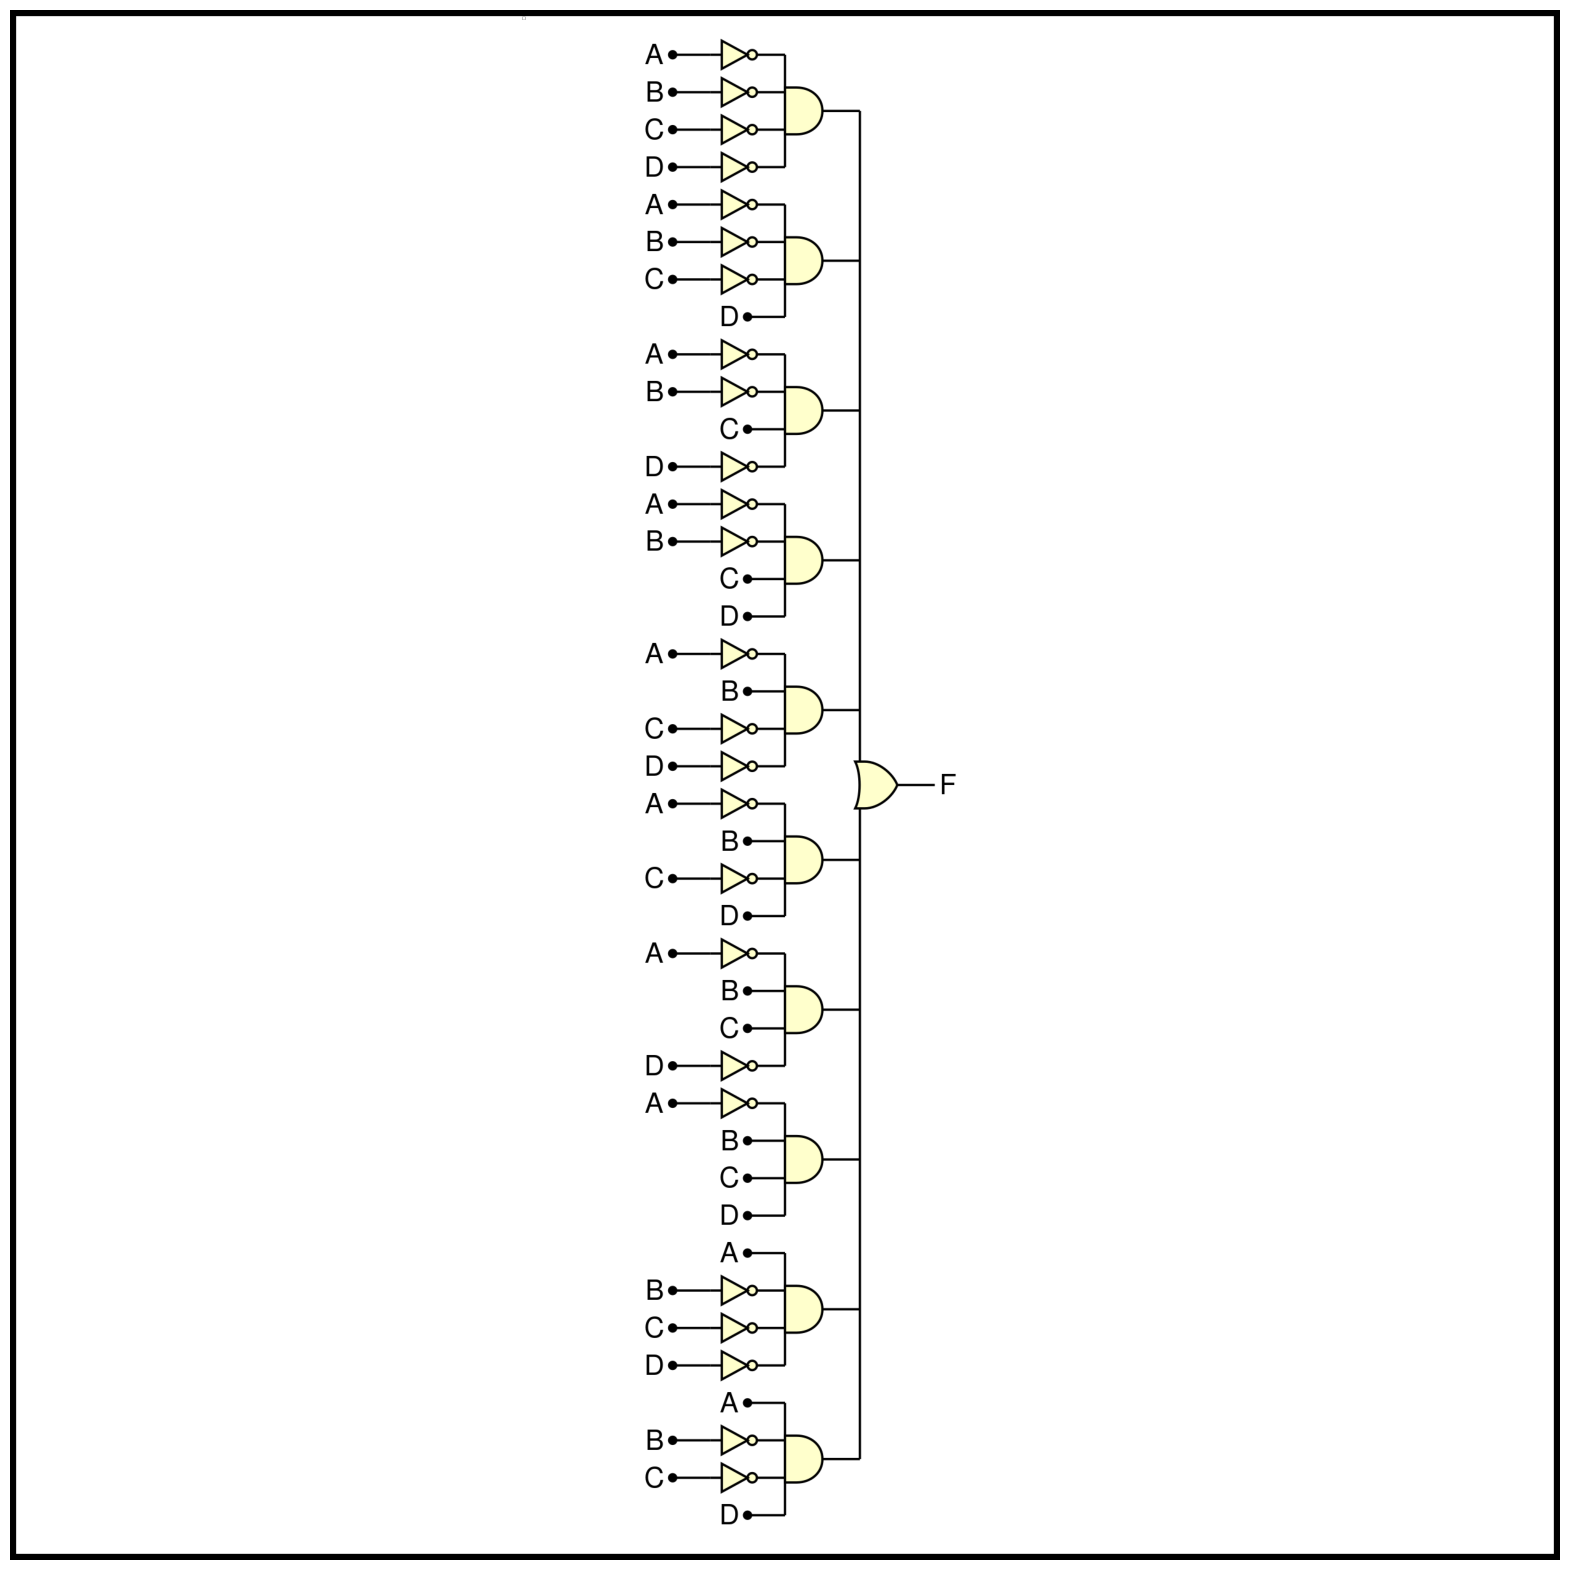

In [2]:
from BooleanAlgebra import LogicPlotter
tp = LogicPlotter()

circuit = {
    "assign": [
        [
            "F",
            ["|", 
             ["&", ["~", "A"],["~", "B"],["~", "C"],["~", "D"]],
             ["&", ["~", "A"],["~", "B"],["~", "C"], "D"],
             ["&", ["~", "A"],["~", "B"],"C",["~", "D"]],
             ["&", ["~", "A"],["~", "B"],"C","D"],
             ["&", ["~", "A"],"B",["~", "C"],["~", "D"]],
             ["&", ["~", "A"], "B",["~", "C"], "D"],
             ["&", ["~", "A"], "B", "C",["~", "D"]],
             ["&", ["~", "A"], "B","C", "D"],
             ["&",  "A",["~", "B"],["~", "C"],["~", "D"]],
             ["&", "A",["~", "B"],["~", "C"],"D"],
            ],
        ]
    ]
}

tp.make_logic(circuit,20,40,2500,2500)

From the diagram, we need:
- 25 7404 ICs (not gates)                                       = 100\$
- 5 7408 ICs (and gates) $\rightarrow $ ceil(( 20x two input and gates)/(4 gates per IC)) = 20\$
- 10 7432 IC  (2pin or gate) = 40\$
- 4 switched to control the system = 8\$
- 1 led =2$
- 40 + 10 + 25 wires = 75\$

#### **Total BOM cost = 245**\$
----

## [2.3] First Reuction: (using only AND, OR, NOT)

$A'+ B'C'$

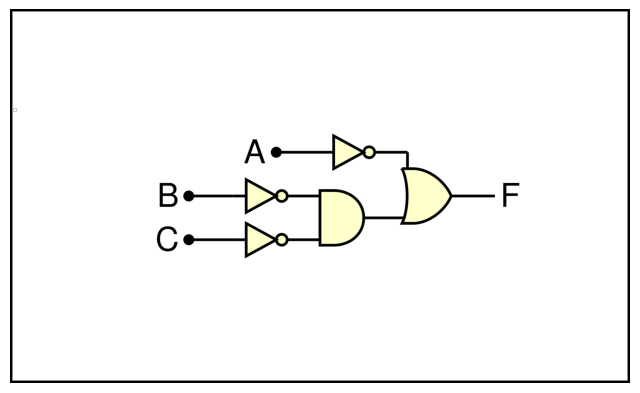

In [4]:

tp = LogicPlotter()
circuit = {
    "assign": [
        [
            "F",
            ["|", ["~", "A"], 
             ["&", ["~", "B"],["~", "C"]]
            ],
        ]
    ]
}

tp.make_logic(circuit)

From the diagram, we need:
- 3 7404 ICs (not gates)                = 12\$
- 1 7408 ICs (and gates) $\rightarrow $ = 4\$
- 1 7432 IC  (or gate) = 4\$
- 3 switches to control the system = 6\$
- 1 led =2$
- 2 + 2+3 +1 wires = 9\$

#### **Total BOM cost = 39**\$
-----

## [4.1] NAND only Reduction (Bubble Method)(No Don't Cares)

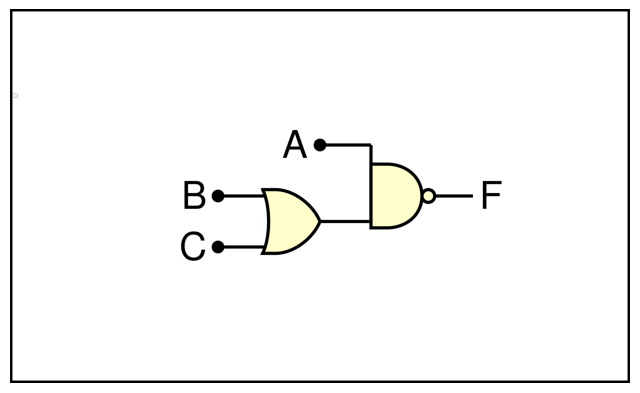

In [5]:
from BooleanAlgebra import LogicPlotter

tp = LogicPlotter()
circuit = {
    "assign": [
        [
            "F",
            ["~&",  "A", 
             ["|",  "B", "C"]
            ],
        ]
    ]
}

tp.make_logic(circuit)

In [6]:
display("Verifying that the reduced circuit has the same truth table as before, it does. ")
Signal(4, expression=['not ( A and ( B or C ))']).display()

'Verifying that the reduced circuit has the same truth table as before, it does. '

### Truth Table

,A,B,C,D,F
0,0,0,0,0,1
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,1
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,1


### KMAP

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',1,1,1,1
01,A'B,1,1,1,1
11,AB,0,0,0,0
10,AB',1,1,0,0


### KMAP Legend

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',0,1,3,2
01,A'B,4,5,7,6
11,AB,12,13,15,14
10,AB',8,9,11,10


Final Part cost :

- 1 7420 ICs (nand gates)  = 4\$
- 1 7432 IC (or gate) = 4\$
- 3 switches to control the system = 6\$
- 1 led =2\$
- 5 wires = 5\$

#### **Total reduced BOM cost: 21\$**

Therefore, there was a 9.1x cost reduction

------

### [4.2] Don't Care Reduction
See above KMAP legend, setting 11 and 10 to don't care would result in the following groups:

$(0,1,2,3,4,5,6,7)\rightarrow A'$

$(0,1,2,3,8,9,10,11) \rightarrow B'$

Therefore, the final reduction is  : $A' + B'$

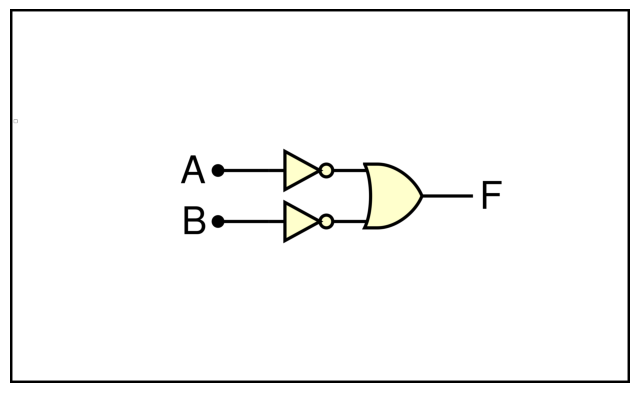

In [7]:
from BooleanAlgebra import LogicPlotter

tp = LogicPlotter()
circuit = {
    "assign": [
        [
            "F",
             ["|",  ["~","A"], ["~","B"]]
            ],
        ]
}

tp.make_logic(circuit)

Final Part cost :

- 2 7404 ICs (not gates)  = 4\$
- 1 7432 IC (or gate) = 4\$
- 2 switches to control the system = 6\$
- 1 led =2\$
- 5 wires = 5\$

#### **Total reduced BOM cost: 19\$**

------

### [4.4] NAND only Don't Care Reduction
Convert the don't care logic diagram to use only NAND gates.

*Note:  I used the demorgans law here*

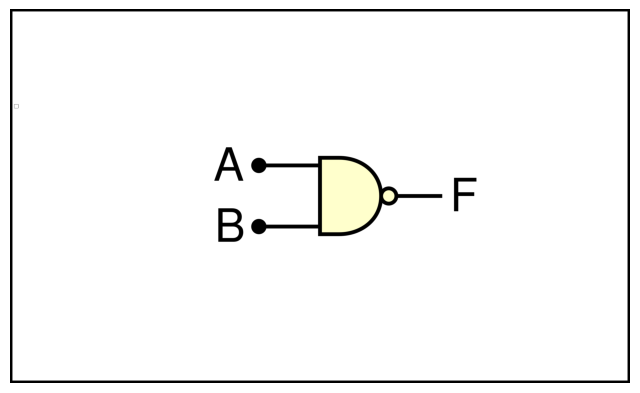

In [8]:
tp = LogicPlotter()
circuit = {
    "assign": [
        [
            "F",
             ["~&",  "A", "B"]
            ],
        ]
}

tp.make_logic(circuit)

Final Part cost :

- 1 7420 ICs (nand gates)  = 4\$
- 2 switches to control the system = 4\$
- 1 led =2\$
- 3 wires = 3\$

#### **Total reduced BOM cost: 13\$**

In [9]:
display("Note, 10 and 11 minterms are don't cares. The truth table is equivalent to the starting circuit so this is valid. Very cool that we can reduce to a single nand gate")
Signal(4, expression=['not ( A  and B)']).display()

"Note, 10 and 11 minterms are don't cares. The truth table is equivalent to the starting circuit so this is valid. Very cool that we can reduce to a single nand gate"

### Truth Table

,A,B,C,D,F
0,0,0,0,0,1
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,1
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,1


### KMAP

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',1,1,1,1
01,A'B,1,1,1,1
11,AB,0,0,0,0
10,AB',1,1,1,1


### KMAP Legend

,,00,01,11,10
,,C'D',C'D,CD,CD'
00,A'B',0,1,3,2
01,A'B,4,5,7,6
11,AB,12,13,15,14
10,AB',8,9,11,10


____
# [R] Results

**[R.1] "Why isn’t input D needed in the BCD detector design?" :**

Because, D was factored out during minimum SOP reduction. In the Don't care reduction, C is also eliminated

**[R.2] Cost Table**

In [13]:
import pandas as pd

pd.DataFrame({
    "Original/Proto": {"Part Cost":10, "Chip Cost" : 160, "Connection Cost" : 75, "Total Cost": 245},
    "Simplified": {"Part Cost":8, "Chip Cost" : 20, "Connection Cost" : 5, "Total Cost": 33},
    "Don't Care": {"Part Cost":6, "Chip Cost" : 8, "Connection Cost" : 5, "Total Cost": 19},
    "NAND": {"Part Cost":6, "Chip Cost" : 4, "Connection Cost" : 3, "Total Cost": 13},
}).transpose()


,Part Cost,Chip Cost,Connection Cost,Total Cost
Original/Proto,10,160,75,245
Simplified,8,20,5,33
Don't Care,6,8,5,19
NAND,6,4,3,13


In [3]:
from BooleanAlgebra import LogicPlotter
tp = LogicPlotter()

circuit = {
    "assign": [
        [
            "F",
            ["|", 
             ["&", ["~", "A"],["~", "B"],["~", "C"],["~", "D"]],
             ["&", ["~", "A"],["~", "B"],["~", "C"], "D"],
             ["&", ["~", "A"],["~", "B"],"C",["~", "D"]],
             ["&", ["~", "A"],["~", "B"],"C","D"],
             ["&", ["~", "A"],"B",["~", "C"],["~", "D"]],
             ["&", ["~", "A"], "B",["~", "C"], "D"],
             ["&", ["~", "A"], "B", "C",["~", "D"]],
             ["&", ["~", "A"], "B","C", "D"],
             ["&",  "A",["~", "B"],["~", "C"],["~", "D"]],
             ["&", "A",["~", "B"],["~", "C"],"D"],
            ],
        ]
    ]
}

tp.make_logic(circuit,20,40,2500,2500)

ValueError: min() arg is an empty sequence